In [2]:
#https://medium.com/swlh/multi-linear-regression-using-python-44bd0d10082d
#https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/
#https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c
#https://towardsdatascience.com/multivariate-linear-regression-in-python-step-by-step-128c2b127171
#https://medium.com/codex/top-10-python-operations-that-every-aspiring-data-scientist-should-know-92b6f9a98ff9
#Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Load dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI-Linear-Regression/main/data/pie-sales.csv', 
                     index_col='week', sep=';')

print(df_pie.shape)
df_pie

#to read your own dataset, put the CSV file in the same folder as this code, below is an example of how to read it
#dataset = pd.read_csv("advertising.csv")
# To see the first few observations do dataset.head()

C:\Users\DioandNono\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\DioandNono\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


(15, 3)


,pie_sales,price,advertising
week,,,
1,350,5.5,3.3
2,460,7.5,3.3
3,350,8.0,3.0
4,430,8.0,4.5
5,350,6.8,3.0
6,380,7.5,4.0
7,430,4.5,3.0
8,470,6.4,3.7
9,450,7.0,3.5


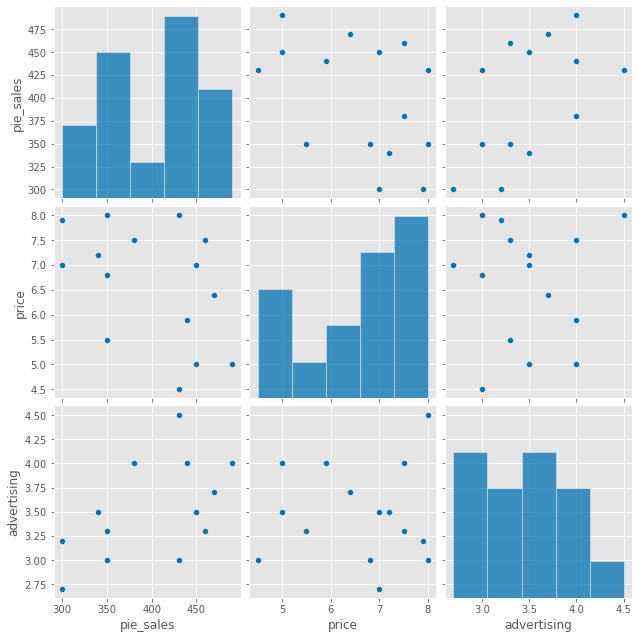

In [3]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df_pie, height=3)

In [3]:
# Set independent and dependent variables, this has to be changed
X = df_pie[['price', 'advertising']]
y = df_pie['pie_sales']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 306.5261932837436
Coefficients: [-24.97508952  74.13095749]


Pearson correlation coefficient matrix of each variables:
              pie_sales     price  advertising
pie_sales     1.000000 -0.443273     0.556320
price        -0.443273  1.000000     0.030438
advertising   0.556320  0.030438     1.000000


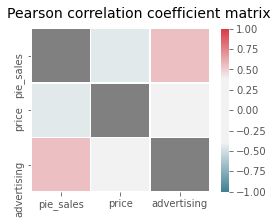

In [5]:
#This has to be changed
corr = df_pie[['pie_sales', 'price', 'advertising']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

In [4]:
#This has to be changed
X = df_pie[['price', 'advertising']]
X = sm.add_constant(X) # adding a constant

#this has to be changed
olsmod = sm.OLS(df_pie['pie_sales'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Sat, 05 Mar 2022   Prob (F-statistic):             0.0120
Time:                        08:31:26   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      